<a href="https://colab.research.google.com/github/judahwo/PyTorch_Full_Course/blob/main/01_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyTorch Workflow**

What is workflow? 

**Definiition:** <br>
In PyTorch, a **workflow** refers to the sequence of steps involved in building and training a neural network model. It typically includes the following stages:

1. **Data Preparation** - preprocessing the data for training.
2. **Model Definition** - define the architecture of the neural network.
3. **Model Instantiation** - creating an actual instance of the neural network model that you will train.
4. **Loss Function Selection** - quantifies the discrepancy between the model's predictions and the actual target values.
5. **Optimization Algorithm Selection** - select algorithm to update the model's parameters based on the computed loss.
6. **Training Loop** - main part of the workflow where the model is trained. It involves iterating over the training data in mini-batches, performing forward pass, computing loss, performing backward pass, and updating parameters using the chosen algorithm.
7. **Evaluation** - evaluate the performance of the trained model on a separate validation test set. 
8. Optional - saving and loading the model.

Each of these stages is typically implemented as a series of Python code blocks, allowing for flexibility and customization at each step. By following this workflow, you can effectively build, train, and evaluate neural network models using PyTorch.

**References:** <br>

Course Chapter 1: https://www.learnpytorch.io/01_pytorch_workflow/ <br>
YouTube Video: https://www.youtube.com/watch?v=V_xro1bcAuA&t=16870


**This Course Covers:** <br>
1: data (prepare and load) <br>
2: build model <br>
3: training - fitting the model to data <br>
4: making predictions adn evaluating the model (inference) <br>
5: saving and loading a model <br>
6: putting it all together  <br>

## **Getting Setup**

**References:** <br>
**torch.nn**: https://pytorch.org/docs/stable/nn.html <br>
**matplotlib**: https://matplotlib.org/

In [ ]:
import torch
from torch import nn # nn contains all PyTorch building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

### **Data: Preparing and Loading**

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos
* Audio
* DNA
* Text

Maching learning is a game of 2 parts: 
1. Get data into numerical representation.
2. Build a model to learn patterns in that numerical representation. 

To showcase this, let's create some *known* data using the linear regression formula. <br> 

We'll use linear regression to make a straight line with *known* **parameters**. <br>

**References:** <br>
Linear Regression: https://en.wikipedia.org/wiki/Linear_regression


In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], y[:10],

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### **Training, Validation, and Test sets**

**One of the most important concepts in machine leanring**

**Definitions:** <br>

**Training Set:** The model learns from this data (like the course materials you study during the semester).

**Validation Set:** The model learns from this data (like the course materials you study during the semester).

**Test Set:** The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester).

**References:**

https://en.wikipedia.org/wiki/Training,_validation,_and_test_data_sets <br>
https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data <br>
https://www.learnpytorch.io/01_pytorch_workflow/#split-data-into-training-and-test-sets <br>


In [ ]:
# Training set example:
import torch
from torch.utils.data import Dataset

class MyDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        sample = self.data[index]
        target = self.targets[index]
        return sample, target

In this example, data represents the input data (e.g., a tensor of images), and targets represents the corresponding labels (e.g., a tensor of class indices). The `__len__` method returns the length of the dataset, and `__getitem__` returns a specific sample and its target label when given an index.

Once you have defined your custom training set class, you can instantiate it and use it in combination with other PyTorch utilities such as d*ata loaders, optimizers, and loss functions* to train your model effectively.

In [ ]:
# Now that we have seen a full example, let's start again and work piece by piece
# Note: Must run previous section to define X

# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

**Code Explaination:**

|Line #|Code Example|What does it do?|
|---------------|:---------------:|:---------------|
|5|`train_split = int(0.8 * len(X))`|This line calculates the index at which to split the data into a training set and a test set.<br> It uses the length of the variable X and multiplies it by 0.8, representing an 80% training<br> set and 20% test set split.|
|6|`X_train, y_train = X[:train_split], y[:train_split]`|This line assigns the training set data and labels. It uses slicing to extract the elements<br> from X and y up to the train_split index.|
|7|`X_test, y_test = X[train_split], y[train_split]`|This line assigns the test set data and labels. It uses indexing to retrieve the element at<br> the train_split index from X and y.|
|9|`len(X_train), len(y_train), len(X_test), len(y_test)`|This line calculates and returns the lengths of X_train, y_train, X_test, and y_test. It provides<br> the number of samples or data points in each respective set.|



In [ ]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

### **Visualize the data**

How might we better visualize our data?

Matplotlib!!!

**References:** <br>
plt.scatter - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

In [ ]:
def plot_predictions (train_data = X_train,
                      train_labels = y_train,
                      test_data = X_test,
                      test_labels = y_test,
                      predictions = None):
  """
  Plots training data, test data and compares predictions.
  """

  # Plot training data (blue)
  plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training data")

  # Plot test data (green)
  plt.scatter(test_data, test_labels, c ="g", s = 4, label = "Testing data")

  # Predictions? 
  if predictions is not None: 
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c = "r", s = 4, label = "Predictions")
  
  # Show Legend
  plt.legend(prop = {"size": 14});

**Code Explaination:** 

|Line #|Code Example|What does it do?|
|:---------------:|:---------------:|:---------------|
|1|`def plot_predictions`|This line defines a function named `plot_predictions`. This function takes five arguments: |
|1|`train_data = X_train`|argument 1, training data|
|2|`train_labels = y_train`|argument 2, training labels|
|3|`test_data = X_test`|argument 3, testing data|
|4|`test_labels = y_test`|argument 4, test labels|
|5|`predictions = None`|arument 5, predictions if any|
|11|`plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training data")`|This line uses `matplotlib.pyplot`'s scatter function to create a scatter plot of the training<br> data. The data points will be colored blue ('b') and the size of the markers is set to 4. A label<br> "Training data" is also added for this plot.|
|14|`plt.scatter(test_data, test_labels, c ="g", s = 4, label = "Testing data")`|Similarly, this line plots the testing data. The data points will be colored green ('g') and the<br> size of the markers is also set to 4. A label "Testing data" is added for this plot.|
|17|`if predictions is not None:`|This line checks if `predictions` is not `None`. If `predictions` was provided when the function<br> was called, then it will proceed with the following lines.|
|19|`plt.scatter(test_data, predictions, c = "r", s = 4, label = "Predictions")`|This line creates a scatter plot of the predictions, assuming `predictions` is not `None`. The<br> predicted data points will be colored red ('r') and the size of the markers is set to 4. A label<br> "Predictions" is added for this plot.|
|22|`plt.legend(prop = {"size": 14});`|The final line calls the legend function to place a legend on the plot. The legend will contain<br> the labels assigned in the previous scatter plots (i.e., "Training data", "Testing data", and<br> potentially "Predictions"). The size of the legend's text is set to 14.|

Overall, this function allows you to visualize your model's performance by showing the actual data points and, if available, the model's predictions.

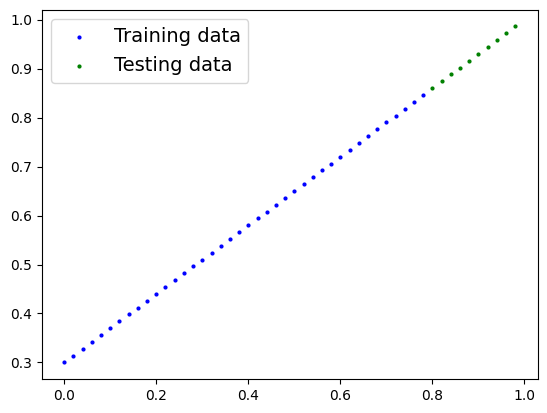

In [ ]:
plot_predictions();

## **Build a model**

Our first PyTorch model!

Very Exciting!! Let's do it!! 

**References:** <br>
**OOP Refresher:** https://realpython.com/python-classes/ <br>
**nn.Module:** https://pytorch.org/docs/stable/generated/torch.nn.Module.html

What our model does: 
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values used to create the data). 

How?

**References:** <br>
**Through two main algorithms:** 
1. **Gradient descent:** https://www.youtube.com/watch?v=IHZwWFHWa-w
2. **Backpropogation:** https://www.youtube.com/watch?v=Ilg3gGewQ5U

In [ ]:
from torch import nn

# Create a linear regression model class
class LinearRegressionModel(nn.Module):                           # almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,                    # start with a random weight and try to adjust it to the ideal weight
                                            dtype = torch.float), # standard PyTorch dtype torch.float32
                                            requires_grad = True) # can this parameter be updated via gradient descent?                                    
    self.bias = nn.Parameter(torch.randn(1,                       # start with random bias (gets adjusted as the model learns)
                                         dtype=torch.float),      # standard PyTorch dtype torch.float32
                                         requires_grad=True)      # can this parameter be updated via gradient descent?
    
  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:           # <- "x" is the input data
    return self.weights * x + self.bias                         # this is the linear regression formula

**Code explaination:**

|Line #|Code Example|What does it do?|
|:---------------:|:---------------:|:---------------|
|1|`from torch import nn`|imports the nn module from the torch package. The `nn `stands for neural networks and<br> this module contains various classes and functions used to build neural networks.|
|4|`class LinearRegressionModel(nn.Module)`|defines a new class called `LinearRegressionModel` that inherits from `nn.Module`. The<br> `nn.Module` is a base class for all neural network modules|
|5|`def __init__(self)`|this is the initializer method that Python classes can implement. When a new instance of<br> the class is created, this method is automatically called to set up the object.-|
|6|`super().__init__()`|this line calls the initializer of the superclass, i.e., nn.Module, this sets up an internal state<br> needed by PyTorch.|
|7|`self.weights = nn.Parameter(torch.randn(1,requires_grad = True,type = torch.float))`|these lines create a PyTorch Parameter for the weights of the linear regression model.<br> Parameters are a special type of Tensor that PyTorch's autograd knows to compute<br> **gradients** with respect to. The `requires_grad = True` means that **gradients** need to<br> be computed with respect to these weights during **backpropagation**, which is necessary<br> for learning.|
|10|`self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)`|Lines 10 - 12 are similar to 7 - 9, but create a Parameter for the bias term. Again, the bias<br> is initialized to a random normal float.|
|15|`def forward(self, x: torch.Tensor)`|This defines the forward pass of the model, i.e., how the model turns inputs into outputs.<br> `x` is the input data.|
|16|`return self.weights * x + self.bias`|This line implements the formula for linear regression, which is just a weighted sum of<br> the inputs plus a bias term. In other words, each input is multiplied by its corresponding<br> weight, all these products are summed together, and then the bias is added. The result<br> is the output of the model.|

### **PyTorch Model Building Essentials**

**References:** <br>
* **`torch.nn`**:  These are the basic building blocks for computational graphs - https://pytorch.org/docs/stable/nn.html
* **`torch.nn.Parameter `**:  What parameters should our model try to learn? Often set by PyTorch layer from torch.nn. - https://pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html
* **`torch.nn.Module`**:  The base class for all neural network modules if you subclass it, you should overwrite forward - https://pytorch.org/docs/stable/generated/torch.nn.Module.html
* **`torch.optim`**:  A package implementing various optimization algorithms - https://pytorch.org/docs/stable/optim.html
* **`torch.utils.data.DataLoader`**:  Creates a python iterable over a torch dataset. - https://pytorch.org/docs/stable/data.html

PyTorch Cheat Sheet: https://pytorch.org/tutorials/beginner/ptcheat.html


### **Checking the Internals of the PyTorch model**

Now that we've creaded a model, let's see what's inside...

We can check the models parameters using **`.parameters()`**

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### **Making Predictions**

**References:** <br>
Using **`torch.inference_mode()`** - https://pytorch.org/docs/stable/generated/torch.inference_mode.html

To check the model's predictive power, let's see how well it predicts y_test based on x_test

When we pass data through the model, it's going to run it through the forward() method. 




In [ ]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

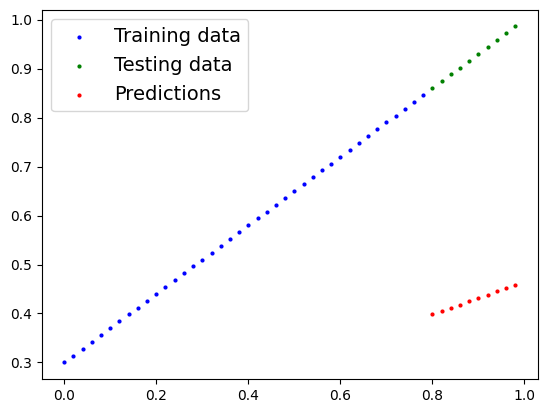

In [ ]:
plot_predictions(predictions=y_preds)

Currently, our predictions are quite bad. We will learn how to write code to **'train'** our model in order to get our predictions to move closer to our ideal values. 

### **Training the Model**

Training a model in PyTorch (or any other deep learning framework) refers to the process of adjusting the model's parameters (like weights and biases) based on data, with the goal of minimizing the error that the model makes on the task it's designed to perform.

Then, in your training loop, you call the forward method on your model, call the loss function with the model's output and the true output, call the backward method on the loss tensor to calculate the gradients, and then call the step method on your optimizer to update the model's parameters.

After a number of iterations of this process, your model will be trained and ready to be tested on new, unseen data.


**References:**<br>
* **Loss Function**: A function to meausre how wrong the model's predictions are to the ideal values, lower is better - https://pytorch.org/docs/stable/nn.html#loss-functions
* **Optimizer**: Takes into account the loss of a model and adjusts the model's parameters (e.g. weight and bias) to improve the loss function - https://pytorch.org/docs/stable/optim.html

In PyTorch specifically, we need a: 

1.  Training Loop 
2.  Testing Loop

### **Loss Function and Optimizer**

**Loss Function:**

* A loss function is a function that quantifies how far the predictions of a machine learning model are from the actual or true values. The goal of training a machine learning model is to minimize the value of the loss function. This function is a fundamental component of most optimization algorithms used to train machine learning models. Different types of loss functions are used depending on the specific type of machine learning task, such as classification or regression.

  * **`torch.nn.L1Loss(size_average=None, reduce=None, reduction='mean')`** 
    * Creates a criterion that measures the mean absolute error (MAE) between each element in the input x and target y. 
    * https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html 

**Optimizer:**

* An optimizer in machine learning is an algorithm or method used to adjust the parameters of a model in order to minimize the model's loss function. The optimization process is what allows a model to learn from data: by iteratively adjusting its parameters in response to the calculated error, the model improves its predictions. Common examples of optimizers include Stochastic Gradient Descent (SGD), Adam, and RMSProp.<br>
  * **`torch.optim.SGD(params, lr=<required parameter>)`**
    * Implements stochastic gradient descent (optionally with momentum).
    * https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD  
    
  * Inside the optimizer you'll often have to set two parameters<br>
      * `params` - the model parameters you'd like to optimize. for example `params=model_0.parameters()`<br>
      * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` = samll change, lare `lr` = large change).

Note: Loss functions and optimizers work in tandem with one another and are often part of the same PyTorch package

In [ ]:
# Check out the parameters (value that the model sets itself)
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate = possibly the most important hyperparamenter (parameter we set)

### **Building Training and Testing Loops**

**PyTorch Training Loop**:

|Number|Step Name|What does it do?|Code Example|
|---------------|:---------------:|:---------------|:---------------|
|1|Forward Pass|The model goes through all of the training data once, performing its<br> `forward()` function calculations.|	`model(x_train)`|
|2|Calculate Loss|The model's outputs (predictions) are compared to the ground truth and<br> evaluated to see how wrong they are.|`loss = loss_fn(y_pred, y_train)`|
|3|Zero gradients|	The optimizers gradients are set to zero (they are accumulated by default) so<br> they can be recalculated for the specific training step.|`optimizer.zero_grad()`|
|	4|Loss Backwards|Computes the gradient of the loss with respect for every model parameter to <br> be updated (each parameter with requires_grad=True). This is known as<br> **backpropagation**, hence "backwards".|`loss.backward()`|
|5|Update Optimizer|Update the parameters with` requires_grad=True` with respect to the loss<br> gradients in order to improve them. This is known as **gradient descent**.|`optimizer.step()`|



In [ ]:
# Create a random seed
torch.manual_seed(42)

# One epoch is a single forward pass through the data... (hyperparameter, set by user)
epochs = 200

# Track different values
test_loss_values = []
loss_values = []
epoch_count = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Place model in training mode
  model_0.train()
  
  # 1. Forward Pass
  y_pred = model_0(X_train)
  
  # print(y_pred)

  # 2. Calculate the loss 
  loss = loss_fn(y_pred, y_train)
  print(f"Loss: {loss}")

  # 3. Zero grad of the optimizer
  optimizer.zero_grad()

  # 4. Loss backwards
  loss.backward()

  # 5. Progress the optimizer
  optimizer.step()

  ### Testing
  model_0.eval() # turns off different settings not needed for evaluation/testing
  with torch.inference_mode(): # turns off gradient tracking
    # 1. Forward Pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test) 

  # Print out what's happenign
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Test: {loss} | Test Loss: {test_loss} ")

  # Print out model state_dict()
  print(model_0.state_dict())   

Loss: 0.31288138031959534
Epoch: 0 | Test: 0.31288138031959534 | Test Loss: 0.48106518387794495 
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
Loss: 0.28983935713768005
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
Loss: 0.2783183455467224
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
Loss: 0.26679736375808716
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
Loss: 0.2552763521671295
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
Loss: 0.24375534057617188
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
Loss: 0.23223432898521423
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
Loss: 0.22071333229541779
OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])
Loss: 0.20919232070446014
OrderedDict([('

We have now run through 200 epochs of the this model.

**PyTorch Testing Loop:**

|Number|Step Name|What does it do?|Code Example|
|---------------|:---------------:|:---------------|:---------------|
|1|Forward pass|The model goes through all of the training data once, performing<br> its forward() function calculations.|`model(x_test)`|
|2|Calculate the loss|The model's outputs (predictions) are compared to the ground truth<br> and evaluated to see how wrong they are.|`loss = loss_fn(y_pred, y_test)`|
|3|Calulate evaluation<br> metrics (optional)|Alongisde the loss value you may want to calculate other evaluation<br> metrics such as accuracy on the test set.|Custom Functions|

In [ ]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

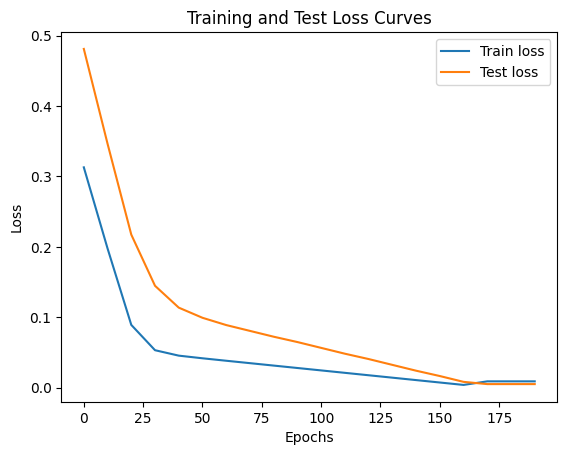

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

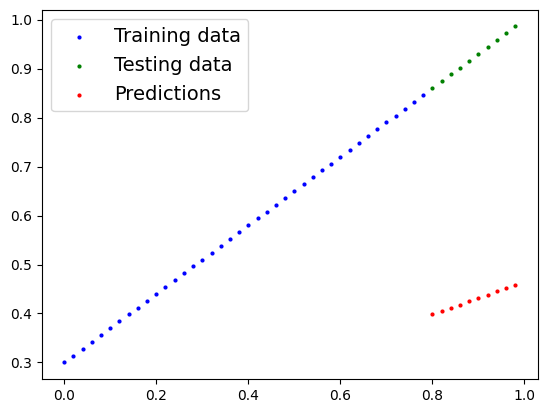

In [ ]:
# Plot old predictions again
plot_predictions(predictions=y_preds)

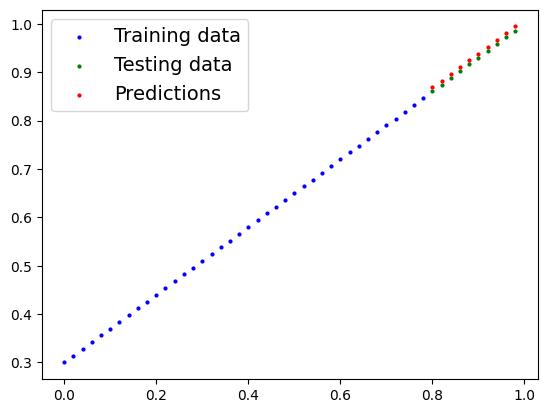

In [ ]:
# Plot new predictions, after running several 100 epochs of the model
plot_predictions(predictions=y_preds_new)

After running 200 epochsh the predictions are now much closer ideal values. Run all to reset the model, also you can change the number of epochs to illustrate the iterations differently. 

## Saving a PyTorch Model

There are three main methods for saving and loading PyTorch models.

1. torch.save() - save a PyTorch object in Python's pickle format - https://pytorch.org/docs/stable/generated/torch.save.html
2. torch.load() - load a saved PyTorch object
3. torch.nn.Module.load_state_dict() -load a model's saved state dictionary

**Resources:** <br>
PyTorch Saving and Loading Models: https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("/content/drive/MyDrive/marcus_data/Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model and save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# Saving the stat_dict
print(f"Saving modle to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving modle to: /content/drive/MyDrive/marcus_data/Models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -1 /content/drive/MyDrive/marcus_data/Models

01_pytorch_workflow_model_0.pth


## Loading a PyTorch Model

We saved our model's `state_dict()` rather than the entire model. We'll create a new instance of our model class and save the `state_dict()` into that. 

In [ ]:
# Original Model
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# To load a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0, this will update the new instance with updated parameters
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
# New Loaded Model
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predictions with our original model
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putting it all together

The final chapter review will implement all of the previous steps all in one section. This is the full model for the chapter:

First, we do a little setup. This time, we will use Device Agnostic Code and the Google Colab GPU. 

**Import Libraries:**

In [ ]:
import torch
from torch import nn # neural network library
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

**Setup device agnostic code:**

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


**Check GPU:**


In [ ]:
!nvidia-smi

Mon May 22 01:08:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 6.1 Data

**Linear Regression:**

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create Formula
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias
X[:10], y[:10],

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

**Split data:**

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

**Plot predictions:**

In [ ]:
def plot_predictions (train_data = X_train,
                      train_labels = y_train,
                      test_data = X_test,
                      test_labels = y_test,
                      predictions = None):
  """
  Plots training data, test data and compares predictions.
  """

  # Plot training data (blue)
  plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training data")

  # Plot test data (green)
  plt.scatter(test_data, test_labels, c ="g", s = 4, label = "Testing data")

  # Predictions? 
  if predictions is not None: 
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c = "r", s = 4, label = "Predictions")
  
  # Show Legend
  plt.legend(prop = {"size": 14});

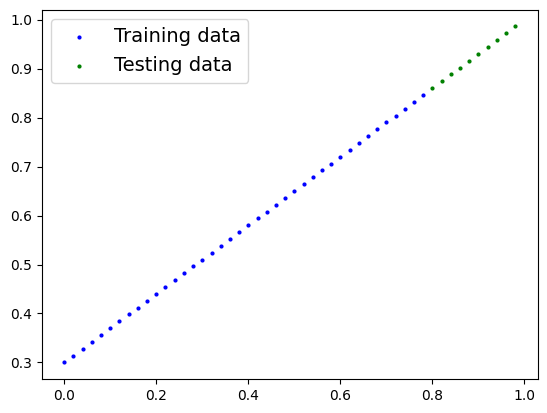

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Build a Model

**References:**

**`nn.Linear()`**:https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

**Linear Regression Model:**

In [ ]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() to create model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
    
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

#Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

### 6.3 Training

* Loss Function
* Optimizer
* Training Loop
* Testing Loop

In [ ]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

**Loss Function and Optimizer:**

In [ ]:
# Loss Function
loss_fn = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01,)

**Training Loop:**

In [ ]:
# Training Loop
torch.manual_seed(42)

epochs = 200

# Device agnostic code for data
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # Forward Pass
  y_pred = model_1(X_train)

  # Calculate Loss
  loss = loss_fn(y_pred, y_train)

  # Optimizer Zero Grad
  optimizer.zero_grad()

  # Backpropagation
  loss.backward()

  # Optimizer Step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print what's happening

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")




Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test Loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test Loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test Loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test Loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test Loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test Loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test Loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test Loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
weight, bias

(0.7, 0.3)

### 6.4 Predictions and Plots

In [ ]:
# Evaluation Mode
model_1.eval()

# Predictions on test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

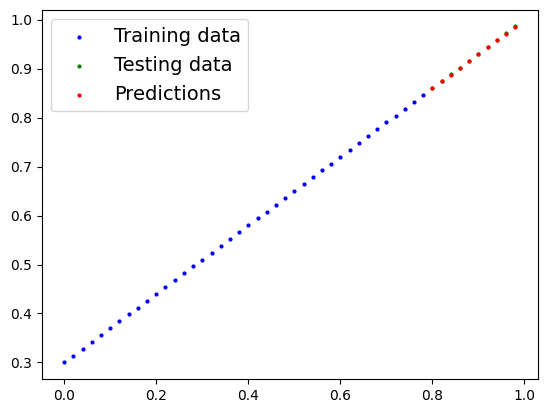

In [ ]:
# Check model prediction visually
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving and Loading a Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("/content/drive/MyDrive/marcus_data/Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model and save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# Saving the stat_dict
print(f"Saving modle to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving modle to: /content/drive/MyDrive/marcus_data/Models/01_pytorch_workflow_model_1.pth


In [ ]:
# Load the Saved Model

# Create a new instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Send loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [ ]:
# Evaluate the loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds 

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

## Excercises and Extra-curriculum

**Chapter 1 Exercise:** https://www.learnpytorch.io/01_pytorch_workflow/#exercises<br>
**Extra-curriculum:** https://www.learnpytorch.io/01_pytorch_workflow/#extra-curriculum<br>
**GitHub Chap. 1 Exercise Template:** https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb<br>
**GitHub Chap. 1 Exercise Solutions:** https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/01_pytorch_workflow_exercise_solutions.ipynb

The idea here is to build the same model again without the guides. Good practice for later. 

This concludes 01 PyTorch Workflow Module!